# Talent Fair 5

## Introduction

### `Fachmi Maris`
HCK 002

Source Dataset :
https://github.com/ardhiraka/talent_fair_sample_challenge/blob/main/datasets/lion-loan-train.csv

### Objective/Expected Result
Lion Parcel dataset

- Able to explain the methodology used for every step, algorithm, data manipulation, data cleansing, etc.
- Able to provide chart or any other measureable methods to prove your findings/inferences.
- Able to provide in-depth customer profiling based on their loan data.
- Able to provide through analysis and story telling based on the data provided

### Problem Statement
- Build a dashboard to handle dataset provided by Hiring Partner. You can explore your own case based on dataset

## Import Library

In [1]:
# Define Libraries
import pandas as pd
import numpy as np
from scipy import stats
import pickle
from sklearn import set_config

# For plotting
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

## Data Loading

In [2]:
df =  pd.read_csv('lion-loan-train.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


|      `COLUMN`      | DESCRIPTION                                                                                                      |
| :----------------: | :---------------------------------------------------------------------------------------------------------------- |
|    `Loan_ID`    | Unique Loan ID  |
|      `Gender`      | Male / Female                                                            |
|  `Married`   | Applicant married (Y/N)  |
|  `Dependents`   | Number of dependents            |
|  `Education`   | Applicant Education (Graduate/ Under Graduate)                                                                                                     |
|  `Self_Employed`   | Self-employed (Y/N)  |
|  `ApplicantIncome`   | Applicant income  |
|  `CoapplicantIncome`   | Coapplicant income  |
|  `LoanAmount`   | Loan amount in thousands  |
|  `Loan_Amount_Term`   | Term of a loan in months  |
|  `Credit_History`   | credit history meets guidelines |
|  `Property_Area`   | Urban/ Semi-Urban/ Rural  |
|  `Loan_Status`   |Loan approved (Y/N)  |

In [6]:
#Check Duplicated
df[df.duplicated()].shape

(0, 13)

In [7]:
#Check Missing Values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## Data Cleaning

In [8]:
#duplicate data
df_clean=df.copy()

df is duplicated so that during the research process it does not change the main dataset

### Handling Missing Values

Removing missing data values in the `Gender`, `Married`, and `Dependents` columns because the number of missing values does not reach 5% of the overall data

In [9]:
df_clean=df_clean.dropna(subset=['Married'])

In [10]:
df_clean=df_clean.dropna(subset=['Gender'])

In [11]:
df_clean=df_clean.dropna(subset=['Dependents'])

In [12]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 586 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            586 non-null    object 
 1   Gender             586 non-null    object 
 2   Married            586 non-null    object 
 3   Dependents         586 non-null    object 
 4   Education          586 non-null    object 
 5   Self_Employed      554 non-null    object 
 6   ApplicantIncome    586 non-null    int64  
 7   CoapplicantIncome  586 non-null    float64
 8   LoanAmount         566 non-null    float64
 9   Loan_Amount_Term   573 non-null    float64
 10  Credit_History     537 non-null    float64
 11  Property_Area      586 non-null    object 
 12  Loan_Status        586 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 64.1+ KB


In the `self_employed` column, fill in the data `nan` to `others` because maybe the loaner is outside the `self_employed` category, such as retirees or housewives and the like

In [13]:
df_clean['Self_Employed'].fillna('Others', inplace=True)

In [14]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 586 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            586 non-null    object 
 1   Gender             586 non-null    object 
 2   Married            586 non-null    object 
 3   Dependents         586 non-null    object 
 4   Education          586 non-null    object 
 5   Self_Employed      586 non-null    object 
 6   ApplicantIncome    586 non-null    int64  
 7   CoapplicantIncome  586 non-null    float64
 8   LoanAmount         566 non-null    float64
 9   Loan_Amount_Term   573 non-null    float64
 10  Credit_History     537 non-null    float64
 11  Property_Area      586 non-null    object 
 12  Loan_Status        586 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 64.1+ KB


Handling missing values for the `LoanAmount`, `Loan_Amount_Term` and `Credit_History` columns with the `median` value if the data is normally distributed and the `mean` value if the data is not normally distributed

In [15]:
num= ['LoanAmount', 'Loan_Amount_Term', 'Credit_History']

In [16]:
eda_df_num = df_clean[num]

In [17]:
skew = eda_df_num.skew()
skewness = pd.DataFrame(skew)
skewness

,0
LoanAmount,2.513983
Loan_Amount_Term,-2.424882
Credit_History,-1.956690


In [18]:
skewness.columns =['value']

In [19]:
skewness['distribution']=0
for i in skewness.index:
  if (skewness["value"][i]>= -0.5) & (skewness["value"][i] <= 0.5):
    skewness["distribution"][i]='distribution normal'
  else:
    skewness["distribution"][i]='distribution not normal'
skewness

C:\Users\fachm\AppData\Local\Temp\ipykernel_15980\3630074379.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skewness["distribution"][i]='distribution not normal'


,value,distribution
LoanAmount,2.513983,distribution not normal
Loan_Amount_Term,-2.424882,distribution not normal
Credit_History,-1.956690,distribution not normal


In [20]:
median_value_LoanAmount = df_clean['LoanAmount'].median()
median_value_Loan_Amount_Term = df_clean['Loan_Amount_Term'].median()
median_value_Credit_History = df_clean['Credit_History'].median()

df_clean['LoanAmount'].fillna(median_value_LoanAmount, inplace=True)
df_clean['Loan_Amount_Term'].fillna(median_value_Loan_Amount_Term, inplace=True)
df_clean['Credit_History'].fillna(median_value_Credit_History, inplace=True)


In [21]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 586 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            586 non-null    object 
 1   Gender             586 non-null    object 
 2   Married            586 non-null    object 
 3   Dependents         586 non-null    object 
 4   Education          586 non-null    object 
 5   Self_Employed      586 non-null    object 
 6   ApplicantIncome    586 non-null    int64  
 7   CoapplicantIncome  586 non-null    float64
 8   LoanAmount         586 non-null    float64
 9   Loan_Amount_Term   586 non-null    float64
 10  Credit_History     586 non-null    float64
 11  Property_Area      586 non-null    object 
 12  Loan_Status        586 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 64.1+ KB


In [22]:
df_clean.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Exploratory Data Analysis (EDA)


visualize the contents of the target field `Loan_Status`

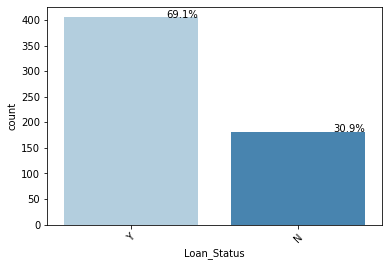

In [23]:
ax = sns.countplot(x="Loan_Status", data=df_clean, palette="Blues")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

for p in ax.patches:
  percentage = '{:.1f}%'.format(100 * p.get_height()/len(df_clean))
  x = p.get_x() + p.get_width()
  y = p.get_height()
  ax.annotate(percentage, (x, y),ha='right')

Visualize the `Loan_status` column by `Gender` and `Education`

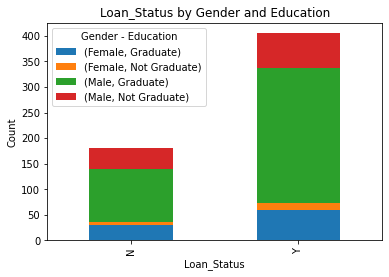

In [24]:


cross_tab = pd.crosstab(index=df_clean['Loan_Status'], columns=[df_clean['Gender'], df_clean['Education']])


cross_tab.plot(kind='bar', stacked=True)

plt.title('Loan_Status by Gender and Education')
plt.xlabel('Loan_Status')
plt.ylabel('Count')
plt.legend(title='Gender - Education')
plt.show()


Visualize the relationship between the `Loan_Status` column and `Property_Area`

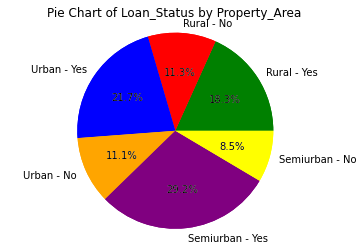

In [25]:



loan_status_counts = df_clean.groupby('Property_Area')['Loan_Status'].value_counts()


rural_loan_status = loan_status_counts['Rural']
urban_loan_status = loan_status_counts['Urban']
semiurban_loan_status = loan_status_counts['Semiurban']


loan_status_data = [rural_loan_status['Y'], rural_loan_status['N'],
                    urban_loan_status['Y'], urban_loan_status['N'],
                    semiurban_loan_status['Y'], semiurban_loan_status['N']]


labels = ['Rural - Yes', 'Rural - No', 'Urban - Yes', 'Urban - No', 'Semiurban - Yes', 'Semiurban - No']
colors = ['green', 'red', 'blue', 'orange', 'purple', 'yellow']

plt.pie(loan_status_data, labels=labels, colors=colors, autopct='%1.1f%%',
        textprops={'color': 'white'})  

plt.pie(loan_status_data, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Pie Chart of Loan_Status by Property_Area')
plt.axis('equal')
plt.show()


Visualize the relationship between the `Loan Status` column and `Credit_History`

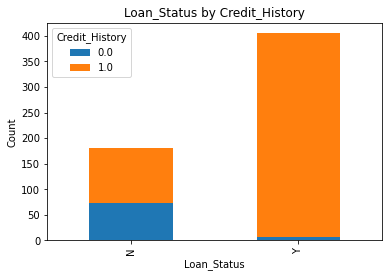

In [26]:


cross_tab = pd.crosstab(index=df_clean['Loan_Status'], columns=[df_clean['Credit_History']])


cross_tab.plot(kind='bar', stacked=True)

plt.title('Loan_Status by Credit_History')
plt.xlabel('Loan_Status')
plt.ylabel('Count')
plt.legend(title='Credit_History')
plt.show()


Visualize the duration of the loan

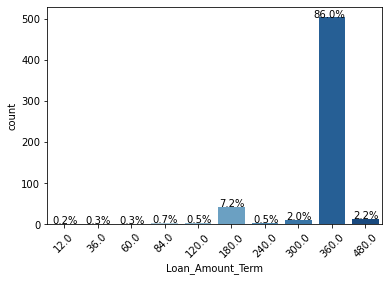

In [27]:
ax = sns.countplot(x="Loan_Amount_Term", data=df_clean, palette="Blues")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

for p in ax.patches:
  percentage = '{:.1f}%'.format(100 * p.get_height()/len(df_clean))
  x = p.get_x() + p.get_width()
  y = p.get_height()
  ax.annotate(percentage, (x, y),ha='right')

Visualize the value range of the `ApplicantIncome` column

In [28]:
px.box(df_clean,x='Loan_Status',y='ApplicantIncome',
       color='Loan_Status',template='ggplot2',
       labels={'Loan_Status':'Loan_Status',
               'ApplicantIncome':'ApplicantIncome'},
       title="<b>ApplicantIncome on Loan_Status")

Visualize about the value of the `Co applicant Income` column

In [29]:
px.box(df_clean,x='Loan_Status',y='CoapplicantIncome',
       color='Loan_Status',template='ggplot2',
       labels={'Loan_Status':'Loan_Status',
               'CoapplicantIncome':'CoapplicantIncome'},
       title="<b>CoapplicantIncome on Loan_Status")

Visualize the value range of the `LoanAmount` column

In [30]:
px.box(df_clean,x='Loan_Status',y='LoanAmount',
       color='Loan_Status',template='ggplot2',
       labels={'Loan_Status':'Loan_Status',
               'LoanAmount':'LoanAmount'},
       title="<b>LoanAmount on Loan_Status")

In [31]:
data=df_clean.copy()

In [32]:
from scipy.stats import f_oneway
from sklearn.preprocessing import LabelEncoder

target_column = "Loan_Status"

if target_column not in data.columns:
    print(f"Kolom {target_column} tidak ditemukan dalam dataset.")
else:
    
    categorical_features = data.select_dtypes(include="object").columns

    
    encoded_data = data.copy()

    
    label_encoder = LabelEncoder()
    for feature in categorical_features:
        encoded_data[feature] = label_encoder.fit_transform(data[feature])

    
    anova_results = {}
    for feature in categorical_features:
        groups = [group_data[feature] for _, group_data in encoded_data.groupby(target_column)]
        f_value, p_value = f_oneway(*groups)
        anova_results[feature] = {"F-value": f_value, "p-value": p_value}

    
    print("Hasil ANOVA:")
    for feature, result in anova_results.items():
        print(f"Fitur: {feature}")
        print(f"   F-value: {result['F-value']}")
        print(f"   p-value: {result['p-value']}")

Hasil ANOVA:
Fitur: Loan_ID
   F-value: 0.4525667367191343
   p-value: 0.5013846589341893
Fitur: Gender
   F-value: 0.2864734553082267
   p-value: 0.5926930805538737
Fitur: Married
   F-value: 5.398845243520869
   p-value: 0.02049246941480323
Fitur: Dependents
   F-value: 0.0054272652190821375
   p-value: 0.9412982156156517
Fitur: Education
   F-value: 3.1027635237833815
   p-value: 0.07868273728918761
Fitur: Self_Employed
   F-value: 0.07882266915334298
   p-value: 0.7789987104727736
Fitur: Property_Area
   F-value: 0.6050675759609346
   p-value: 0.43696602971921616
Fitur: Loan_Status
   F-value: inf
   p-value: 0.0


d:\anaconda\lib\site-packages\scipy\stats\stats.py:3650: F_onewayConstantInputWarning:

Each of the input arrays is constant;the F statistic is not defined or infinite



### Radar Chart

In [33]:
# separating inference data
data_inf = df_clean.sample(2, random_state=16)
# reseting index
data_inf.reset_index(drop=True, inplace=True)
data_inf

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001030,Male,Yes,2,Graduate,No,1299,1086.0,17.0,120.0,1.0,Urban,Y
1,LP002821,Male,No,0,Not Graduate,Yes,5800,0.0,132.0,360.0,1.0,Semiurban,Y


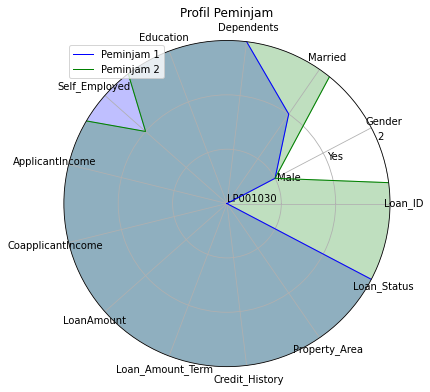

In [35]:
# Menentukan jumlah kategori dan sudut pada radar chart
categories = data_inf.columns.tolist()
N = len(categories)
angles = np.linspace(0, 2*np.pi, N, endpoint=False).tolist()
angles += angles[:1]

# Mengubah dataframe menjadi array
values_peminjam1 = data_inf.loc[0].values.flatten().tolist()
values_peminjam2 = data_inf.loc[1].values.flatten().tolist()
values_peminjam1 += values_peminjam1[:1]
values_peminjam2 += values_peminjam2[:1]

# Membuat radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.plot(angles, values_peminjam1, color='blue', linewidth=1, linestyle='solid', label='Peminjam 1')
ax.fill(angles, values_peminjam1, color='blue', alpha=0.25)
ax.plot(angles, values_peminjam2, color='green', linewidth=1, linestyle='solid', label='Peminjam 2')
ax.fill(angles, values_peminjam2, color='green', alpha=0.25)

# Menambahkan label pada setiap kategori
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

# Menentukan rentang nilai pada radar chart
ax.set_yticks([0, 1, 2, 3])
ax.set_ylim(0, 3)

# Menambahkan legenda dan judul
ax.legend(loc='upper left')
plt.title('Profil Peminjam')

# Menampilkan radar chart
plt.show()

The radar chart represents the profiles of two borrowers, Peminjam 1 and Peminjam 2, based on various attributes. Each attribute is represented by a category on the chart, and the distance from the center of the chart indicates the value or level for that attribute.

In this updated analysis, we focused on the following categories: Loan_ID, Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Property_Area, and Loan_Status.

The blue line and shaded area represent the profile of Peminjam 1, while the green line and shaded area represent the profile of Peminjam 2.

By examining the chart, we can observe the differences and similarities between the two borrowers' profiles. Here are some key findings:

Gender: Peminjam 1 is male, while Peminjam 2 is male.

Marital Status: Neither Peminjam 1 married Peminjam 2 is no.

Dependents: Both Peminjam 1 is have 2 dependets and Peminjam 2 have no dependents.

Education: Both Peminjam 1 is graduates and Peminjam 2 is not graduated.

Self-Employed: Peminjam 1 is not self-employed, while Peminjam 2 is self-employed.

Applicant Income: Peminjam 1 has a lower applicant income compared to Peminjam 2.

Coapplicant Income: Peminjam 1 has a relatively higher coapplicant income. , while Peminjam 2 has no coapplicant income.

Loan Amount: Peminjam 1 has a lower loan amount compared to Peminjam 2.

Loan Amount Term: Peminjam 1 has a lower loan amount compared to Peminjam 2.

Credit History: Both Peminjam 1 and Peminjam 2 have a good credit history.

Property Area: Peminjam 1 is have urban property area and Peminjam 2 at Semiurban property area.

Loan Status: both Peminjam 1 and Peminjam 2 has their loan approved.

Overall, the radar chart provides a visual representation of the profiles of two borrowers and allows us to compare their attributes at a glance. It highlights the differences and similarities between Peminjam 1 and Peminjam 2, giving insights into their loan profiles and the factors influencing their loan approval status.

feature `Married` has a significant influence on `Loan_Status` because A low p-value indicates that differences in educational level have a significant relationship with the likelihood of receiving a loan

## Conclussion

Based on dataset exploration, it is known that the `Y` status in the `Loan_Status` column is dominated by male graduates living in the `Semiurban` area with a loan term of `360 months` and an average loan amount of `144K`


### Improve Plan

- We can make machine learning to make predictions based on customer behavior written in the dataset with appropriate algorithms such as Decision Tree, Random Forest, or Logistic Regression.

- Conduct a deeper and detailed examination of missing values ​​to avoid misunderstandings in understanding the data. You can ask the customer directly for validation.

- Can do clustering in order to find out the right market segmentation so as to know the characteristics of customers who are very suitable for Lion Parcel products and evaluate minority segmentation so that they can carry out the right marketing strategy.



In [34]:
#saving
df_clean.to_csv('df_clean.csv', index=False)


### Dashboard Tableu : 
https://public.tableau.com/app/profile/fachmi.maris/viz/DashboarLionParcel/Dashboard1?publish=yes